<font size="2">
<div class="alert alert-block alert-success">
AUTHOR'S NOTE: Kindly view this page at 100% zoom in your browser for better readability. The font sizes, images, graphs and font styles are designed to suit for the same view.
</div> 
</font>

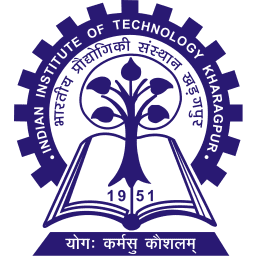

 ###  <center> THE DEFLECTION OF A CIRCULAR PLATE UNDER PURE BENDING MOMENT  <center>
 ###   <center> AND <center>
 ###   <center>  AXISYMMETRIC VIBRATION ANALYSIS OF THE PLATE <center>

### Term project Submitted to : 
&nbsp;&nbsp; __Professor Dr Jeevanjyoti Chakraborty__

### Submitted by :   Group  &nbsp;  6 
 &nbsp;&nbsp; __1.Soham pal    &nbsp; &nbsp; &nbsp; &nbsp; (21ME63R24)__
 
 &nbsp;&nbsp; __2.Gobind Kumar &nbsp;(21ME63R36)__
   
 &nbsp;&nbsp; __3.Avn Ramtarun  &nbsp;(21ME63R39)__

### Objectives of the Project:
 Our project is focussed on solving the problems pertaining to classical plate theory. The prerequisites and the theoritical learnings related to our project are acquired during the course of [Advanced mechanics of solids (ME60402)](http://www.facweb.iitkgp.ac.in/~jeevanjyoti/teaching/advmechsolids/2022/index.html) instructed by our professor [Dr Jeevanjyoti Chakraborty](http://www.facweb.iitkgp.ac.in/~jeevanjyoti/)
 
 The main objectives of our project are:
 
 
 **[1)](#cell1) Obtaining the deflection for a plate subjected to uniform Bending moment all along the circumference.**
 
 
 
   - The Governing equations from the classical plate theory are utilised.
   
   
   - Equation for the Deflection curve of the plate is the final result.
   
   
   The obtained deflection equation can be further utilised for finding the stresses and strains, which can be used for 
   the design of plate for a particular application.(We've restircted ourselves for finding the deflection curve of the
   plate in this project).


 **[2.a)](#cell2) Modal analysis of the plate (same plate as in 1):**
 
   - The governing equations from the classical plate theory are utilised. 
   
   
   - The inertia force, written in terms of double derivative of deflection, is considered as the external force.
   
   
   - The Bessel's differential equations are solved and the final solution will consist first 3 Modal frequencies of the plate 
      along with Mode shapes corresponding to each mode.
   
   
 **[2.b)](#cell3) Validating the solution obtained in 2.a) with Modal analysis performed in ANSYS:**
 
   - The plate is modeled according to the dimensions considered and is analysed in ANSYS for the Modal frequencies.
   
   
   - The modes are simulated and the values are compared with theoritical values obtained in **2.a)** .
   
   
   The modal frequencies and the corresponding mode shapes are utilised while performing the vibration analysis of such members in various applications to avoid failures due to excessive vibrations. The natural frequencies obtained at the end of **2** are closely monitored during the functioning of the member and necessary measures are taken to avoid the working frequencies reach anywhere near to those natural frequencies.
   

### Work distribution: 


1. Soham Pal (21ME63R24) -   Modal analysis of the plate 

2. Gobind Kumar (21ME63R36) - Validating the solution obtained in vibration analysis of plate with Modal analysis performed in ANSYS

3. Avn Ramtarun (21ME63R39) - Obtaining the deflection for a plate subjected to uniform Bending moment all along the circumference.

## 1. Circular plate subjected to Uniform Bending moment

We consider a circular plate of radius, $R$, subjected to uniform bending moment, $M_0$,.
The Governing equation for this case is given as


\begin{gather*}
D\nabla^4w = M_0 <r-R>^{-2} \quad
    for \quad  r \in [0,R]
\end{gather*}


here $ < x-a >^n $ denotes Heaviside function.
    
$\displaystyle D = \frac{Eh^3}{12(1-\nu^2)}$ is the bending stiffness. The transverse deflection $w$ is solely a function of $r$. 

But the governing equation can be solved as: 
    
   \begin{gather*}
\nabla^4 w = 0 \quad
    for \quad  r \in [0,R)
\end{gather*}
    
and the applied moment $M_0 $ can be equated to the term 
   \begin{align*}
    \displaystyle M_r \equiv M_n = \frac{−D}{r}\left(\nu  \frac{dw(r)}{dr}+r\frac{d^2w(r)}{dr^2}\right)
    \end{align*}
    

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

<font size="2">
<div class="alert alert-block alert-success">
AUTHOR'S NOTE: Kindly ensure that the file  <a href="https://raw.githubusercontent.com/Avnrt780/AMOS/main/polarUtilities.py">polar utilities.py</a> is in the same working folder before running the next cell. (Click on the hyperlink, then right click on screen and select 'save as'. Remove the '.txt ' file extension at the end in the file name and save the file in the current working folder).
</div> 
</font>

In [2]:
from polarUtilities import *

We note that 

\begin{align*}
M_x &= -D \left( \frac{\partial^2 w}{\partial x^2} + \nu \frac{\partial^2 w}{\partial y^2} \right), \\
M_y &= -D \left( \frac{\partial^2 w}{\partial y^2} + \nu \frac{\partial^2 w}{\partial x^2} \right), \\
M_{xy} &= -D(1-\nu)\frac{\partial^2 w}{\partial x \partial y}
\end{align*}

We utilize the definitions present in this module to express $M_x$, $M_y$, and $M_{xy}$ in terms of derivatives in the $r-\theta$ coordinate system. (Because of axisymmetry all derivatives with respect to $\theta$ will vanish).

In [3]:
w = sym.Function('w')(r)
D, nu, M0 = sym.symbols('D, nu, M0',positive=True)


def Mx(w):
    return -D*(del_delx(del_delx(w)) + nu*del_dely(del_dely(w))).simplify()

def My(w):
    return -D*(del_dely(del_dely(w)) + nu*del_delx(del_delx(w))).simplify()

def Mxy(w):
    return -D*(1-nu)*del_delx(del_dely(w))

In the $r-\theta$ coordinate system for the circular plate, $n_x = \cos \theta$ and $n_y = \sin \theta$:

In [4]:
nx = sym.cos(theta)
ny = sym.sin(theta)

Then the expression for $M_n \equiv M_r$ can be determined:

In [5]:
def Mn(w):
    return (nx**2*Mx(w) + 2*nx*ny*Mxy(w) + ny**2*My(w)).simplify()

In [6]:
from IPython.display import Math

display(Math(r'M_r = {}'.format(sym.latex(Mn(w)))))

<IPython.core.display.Math object>

Next, we set up the governing equation  
\begin{gather*}
\nabla^4 w = 0 \quad
    for \quad  r \in [0,R) \ in \ polar \ form
\end{gather*}

In [7]:
M0,R,D = sym.symbols('M0,R,D',positive=True)
eq = sym.Eq(polarbiharmonic(w),0)
eq

Eq(Derivative(w(r), (r, 4)) + 2*Derivative(w(r), (r, 3))/r - Derivative(w(r), (r, 2))/r**2 + Derivative(w(r), r)/r**3, 0)

The solution is found as follows:

In [8]:
soln0= sym.dsolve(eq).simplify()
soln0

Eq(w(r), C1 + C2*r**2 + C3*r**2*log(r) + C4*log(r))

We rewrite the solution using $a$, $b$, $c$, and $d$ as the constants of integration:

In [9]:
a, b, c, d = sym.symbols('a, b, c, d')

w_soln = a*r**2*sym.log(r) + b*sym.log(r) + c*r**2 + d
display(Math(r'w = {}'.format(sym.latex(w_soln))))

<IPython.core.display.Math object>

In [10]:
dw = sym.diff(w_soln,r)
display(Math(r'dw(r)/dr = {}'.format(sym.latex(dw))))
d2w = sym.diff(w_soln,r,r)
display(Math(r'd^2w(r)/dr^2 = {}'.format(sym.latex(d2w))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

we know that 
 \begin{align*}
    \displaystyle \sigma_{rr} = \frac{-12zM_{r}}{h^3}
    \end{align*}
    and\
\begin{align*}
    \displaystyle M_r \equiv M_n = \frac{−D}{r}\left(\nu  \frac{dw(r)}{dr}+r\frac{d^2w(r)}{dr^2}\right) 
    \end{align*}

so to make the stresses finite as  $ r \to 0 $,  a and b must be equal to 0

In [11]:
z,h = sym.symbols('z,h')
M = -D*(d2w+nu*dw/r).simplify().expand()
display(M)
sigma_rr = -12*z*M/h**3
display(sigma_rr)

-D*(2*a*nu*log(r) + a*nu + 2*a*log(r) + 3*a + b*nu/r**2 - b/r**2 + 2*c*nu + 2*c)

12*D*z*(2*a*nu*log(r) + a*nu + 2*a*log(r) + 3*a + b*nu/r**2 - b/r**2 + 2*c*nu + 2*c)/h**3

The expression for $M_r$ after substituting a = 0 and b = 0, becomes:

In [12]:
Mr = M.subs(b,0).subs(a,0).simplify()
display(Math(r'M_r = {}'.format(sym.latex(Mr))))

<IPython.core.display.Math object>

equating this $M_r$ to $M_0$

In [13]:
M0 = sym.symbols('M0')
lhs0 = Mr.subs(r,R)
rhs0 = M0
M_eq = sym.Eq(lhs0,rhs0)
display(M_eq)
c_value, = sym.solve(M_eq,c)
display(Math(r'c = {}'.format(sym.latex(c_value))))

Eq(-2*D*c*(nu + 1), M0)

<IPython.core.display.Math object>

We can now impose the two boundary conditions, $w = 0$  at $r = R$  to find the value of constant $d$.

In [14]:
w_soln_interim = w_soln.subs(a,0).subs(b,0).subs(c,c_value)
display(Math(r'w = {}'.format(sym.latex(w_soln_interim))))

d_value, = sym.solve(sym.Eq(w_soln_interim.subs(r,R),0),d)
display(Math(r'd = {}'.format(sym.latex(d_value))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The final solution is then:

In [15]:
w_soln_final = (w_soln.subs([(c,c_value),(d,d_value),(a,0),(b,0)])).simplify()
display(Math(r'w_{{\rm soln}} = {}'.format(sym.latex(w_soln_final))))

<IPython.core.display.Math object>

Now, we can rewrite the result for our clarity as:
$$
w_{soln} = k\left(1-\frac{r^2}{R^2}\right)
$$

where,
$$
k = \frac{M_o R^2}{2D\left(1+\nu \right)}
$$

Hence we can have a non dimensional result as:

$$
w_d = \frac{w_{soln}}{k} = 1-\frac{r^2}{R^2}
$$

Text(0.5, 1.0, '$w_d \\;vs.\\; rp(=r/R)$')

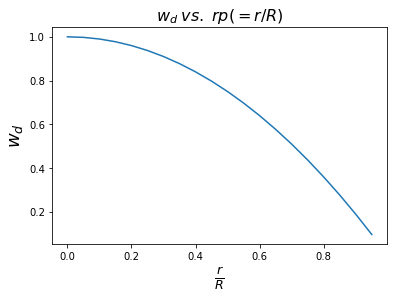

In [16]:
def w_d(v):
    return (1-v**2)

rp = np.arange(0,1,0.05)
wd = np.zeros(len(rp))

for i,n in enumerate(rp):
    wd[i] = w_d(n)

plt.plot(rp,wd)
plt.xlabel(r'$\frac{r}{R}$',fontsize = 18)
plt.ylabel(r'$w_d$',fontsize = 18)
plt.title(r'$w_d \;vs.\; rp(=r/R)$',fontsize = 16)

So from the plot and also intuitively we can say that maximum deflection occurs at $r=0$


In [17]:
w_max = w_soln_final.subs([(r,0)])
display(Math(r'Maximum \; deflection = {}'.format(sym.latex(w_max))))

<IPython.core.display.Math object>

<a id="cell2"></a>

## 2. Vibration of Clamped Circular Plate considering Classical Plate Theory

### a. Modal Analysis of Plate 


For this problem we will consider the axis-symmetric vibration of plate and try to formulate it following the Classical Plate Theory. From Classical Plate Theory we have the following governing equation :-

$$
D\nabla^4w-q=0
$$

where q = Load per unit area on the plate acting along the z direction which acts downwards.

Now since the plate is vibrating about it's mean static position under it's own weight, the load per unit length is equal to the inertia load arising due to it's mass and accelaration.

So, for this case we can replace $q$ with $-\rho\frac{\partial^2 w}{\partial t^2}$.

We hence obtain :

$$
D\nabla^4w+\rho\frac{\partial^2 w}{\partial t^2}=0
$$

In [18]:
r,t = sym.symbols('r,t',positive=True,real = True)
ro,D,h,R = sym.symbols('rho,D,h,R',positive=True)
w = sym.Function('w')(r,t)

Since we are considering only axissymmetric vibrations the governing equation of the Classical Plate Theory can be simplified as shown:

$$
\frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \frac{\partial w}{\partial r} \right)\right)\right) + \frac{\rho h}{D} \frac{\partial^2 w}{\partial t^2} = 0 
$$

In [19]:
def po_lap_r(w):
    return (1/r)*sym.diff(r*sym.diff(w,r),r).simplify()

def po_bih_r(w):
    return po_lap_r(po_lap_r(w)).simplify()

def lhs(w):
    return (po_bih_r(w)+(ro*h/D)*sym.diff(w,(t,2))).simplify()

In [20]:
lhs1 = lhs(w)
rhs1 = 0
eq1 = sym.Eq(lhs1,rhs1)
display(eq1)

Eq(Derivative(w(r, t), (r, 4)) + 2*Derivative(w(r, t), (r, 3))/r - Derivative(w(r, t), (r, 2))/r**2 + Derivative(w(r, t), r)/r**3 + h*rho*Derivative(w(r, t), (t, 2))/D, 0)

Now we assume a solution for $w(r,t)$ as shown:
$$
w(r,t) = W(r)\cos(\omega t + \phi)
$$

In [21]:
wr = sym.Function('W')(r)
omega,phi = sym.symbols('omega,phi')
wn = wr*sym.cos(omega*t+phi)
display(Math(r'w(r,t)\;=\;{}'.format(sym.latex(wn))))

<IPython.core.display.Math object>

In [22]:
lhs1_n = lhs(wn)
display(sym.Eq(lhs1_n,0))

Eq((D*(r**3*Derivative(W(r), (r, 4)) + 2*r**2*Derivative(W(r), (r, 3)) - r*Derivative(W(r), (r, 2)) + Derivative(W(r), r)) - h*omega**2*r**3*rho*W(r))*cos(omega*t + phi)/(D*r**3), 0)

Now since are interested in non trivial solutions we will consider:
$$
\frac{d^4}{dr^4}W(r) + \frac{2}{r}\frac{d^3}{dr^3}W(r) - \frac{1}{r^2}\frac{d^2}{dr^2}W(r) + \frac{1}{r^3}\frac{d}{dr}W(r) - \frac{h \omega^2 \rho}{D}W(r) = 0
$$

We make the following substitution :
$$
k^4 = \frac{h\omega^2\rho}{D}
$$

In [23]:
k = sym.symbols('k',positive=True)
lhs1_n = po_bih_r(wr)-k**4*wr
display(sym.Eq(lhs1_n,0))

Eq(-k**4*W(r) + Derivative(W(r), (r, 4)) + 2*Derivative(W(r), (r, 3))/r - Derivative(W(r), (r, 2))/r**2 + Derivative(W(r), r)/r**3, 0)

The above eqaution can be rewritten as :
$$
\left( \left( \frac{\partial^2}{\partial r^2} + \frac{1}{r} \frac{\partial}{\partial r} \right)^2 - k^4 \right)W(r) = 0
$$

or,
$$
\left( \left( \frac{\partial^2}{\partial r^2} + \frac{1}{r} \frac{\partial}{\partial r} \right) - k^2\right)\left( \left( \frac{\partial^2}{\partial r^2} + \frac{1}{r} \frac{\partial}{\partial r} \right) + k^2\right)W(r) = 0
$$

Hence we get 2 differential equation:
$$
\left( \left( \frac{\partial^2}{\partial r^2} + \frac{1}{r} \frac{\partial}{\partial r} \right) - k^2\right)W(r) = 0
$$

and
$$
\left( \left( \frac{\partial^2}{\partial r^2} + \frac{1}{r} \frac{\partial}{\partial r} \right) + k^2\right)W(r) = 0
$$

We consider the first equation :

In [24]:
lhs1 = po_lap_r(wr) - k**2*wr
rhs1 = 0
eq1 = sym.Eq(lhs1,rhs1)
display(eq1)

Eq(-k**2*W(r) + (r*Derivative(W(r), (r, 2)) + Derivative(W(r), r))/r, 0)

In [25]:
eq1_sol = sym.dsolve(lhs1)
eq1_sol

Eq(W(r), C1*besseli(0, k*r) + C2*bessely(0, I*k*r))

We have obtained the solution mathematically but we have to consider wheather the results are suitable practically. So we will try to plot each of the components of the obtained solution.

Text(0.5, 0, '$\\bar{r}$')

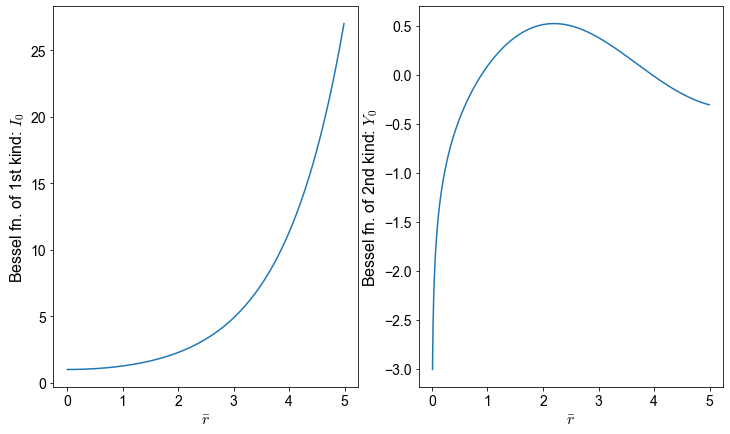

In [26]:
from matplotlib import rcParams
from scipy.special import j0,j1,i0,i1,y0

rcParams['font.family']='sans'
rcParams['font.sans-serif']='Arial'
rcParams['font.size']=14
rcParams['mathtext.fontset']='cm'

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

import numpy as np

n_values = np.arange(0,5,0.01)
besseli_values = i0(n_values)
bessely_values = y0(n_values)
                           
ax1.plot(n_values,besseli_values)
ax1.set_ylabel(r'Bessel fn. of 1st kind: $I_0$',fontsize = 16)
ax1.set_xlabel(r'$\bar{r}$',fontsize = 16)


ax2.plot(n_values,bessely_values)
ax2.set_ylabel(r'Bessel fn. of 2nd kind: $Y_0$',fontsize = 16)
ax2.set_xlabel(r'$\bar{r}$',fontsize = 16)

As we see that Bessel function of second kind ($Y_0$) tends to infinity as $r$ tends to 0 we say that $C_2=0$ 

Hence we are left with :
$$
W(r) = C_1I_0(kr)
$$

We consider the second equation

In [27]:
lhs2 = po_lap_r(wr) + k**2*wr
rhs2 = 0
eq2 = sym.Eq(lhs2,rhs2)
display(eq2)

Eq(k**2*W(r) + (r*Derivative(W(r), (r, 2)) + Derivative(W(r), r))/r, 0)

In [28]:
eq2_sol = sym.dsolve(lhs2)
eq2_sol

Eq(W(r), C1*besselj(0, k*r) + C2*bessely(0, k*r))

Similar to the above steps we will again check for the practical suitability of the obtained results.

Text(0.5, 0, '$\\bar{r}$')

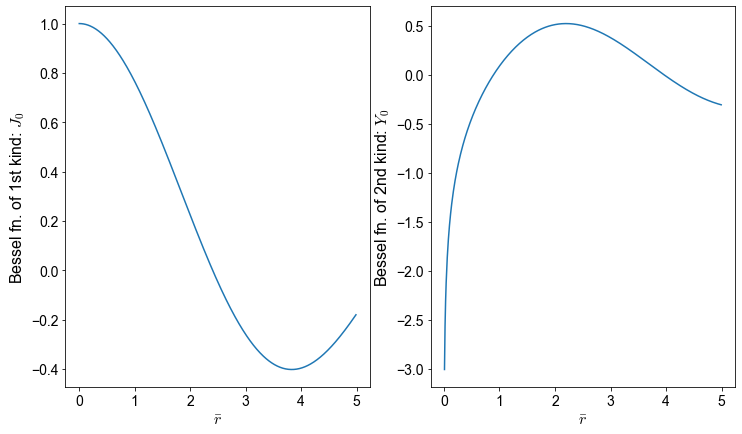

In [29]:
rcParams['font.family']='sans'
rcParams['font.sans-serif']='Arial'
rcParams['font.size']=14
rcParams['mathtext.fontset']='cm'

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

import numpy as np

n_values = np.arange(0,5,0.01)
besselj_values = j0(n_values)
bessely_values = y0(n_values)
                           
ax1.plot(n_values,besselj_values)
ax1.set_ylabel(r'Bessel fn. of 1st kind: $J_0$',fontsize = 16)
ax1.set_xlabel(r'$\bar{r}$',fontsize = 16)


ax2.plot(n_values,bessely_values)
ax2.set_ylabel(r'Bessel fn. of 2nd kind: $Y_0$',fontsize = 16)
ax2.set_xlabel(r'$\bar{r}$',fontsize = 16)

We observe here that as the Bessel function of the second kind ($Y_0$) of zeroth order tends to infinity as $r$ tends to 0 we deduce $C_2 = 0$

Hence we end up with :
$$
W(r) = C_1J_0(kr)
$$

Joining the above two results we get the following general solution:
$$
W(r) = AI_0(kr) + BJ_0(kr)
$$

Now, we will clamped plate.
So we have the following conditions :
$$
W(r=R) = 0 
$$

$$
\left(\frac{dW(r)}{dr}\right)_{r=R} = 0
$$

Hence we obtain:

$$
AI_0(kR) + BJ_0(kR) = 0
$$

$$
\left(A\left(\frac{d I_0(kr)}{dr}\right) + B\left(\frac{d J_0(kr)}{dr}\right)\right)_{r=R} = 0
$$

Now we know,
$$
\frac{d I_0(x)}{dx} = I_1(x)
$$

$$
\frac{d J_0(x)}{dx} = -J_1(x)
$$

Hence we obtain:
$$
\frac{J_0(kR)}{I_0(kR)} = -\frac{J_1(kR)}{I_1(kR)}
$$

or,

$$
J_0(kR)I_1(kR) + J_1(kR)I_0(kR) = 0
$$

This is the characteristic equation which we will use to find the modes of vibration.

We try to find the values of $kR$ roots of the equation now..

In [30]:
from scipy.optimize import fsolve

def eq(x):
    return j0(x)*i1(x) + j1(x)*i0(x)

Text(0, 0.5, 'eq (kR)')

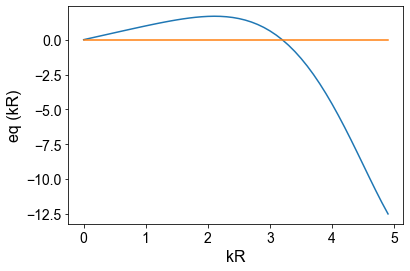

In [31]:
kR_val = np.arange(0,5,0.1)
eq_val = np.zeros(len(kR_val))

for i,n in enumerate(kR_val):
    eq_val[i] = eq(n)

plt.plot(kR_val,eq_val)
plt.plot(kR_val,np.zeros(len(kR_val)))
plt.xlabel('kR',fontsize = 16)
plt.ylabel('eq (kR)',fontsize = 16)

From the above plot we say that there lies a root of the characteristic equation in the range $0<Kr<5$ at around $Kr=3$

In [32]:
soln1 = fsolve(eq,3)
display(Math('Root\;around\;kR = 3\;:\;\;{}'.format(sym.latex(soln1[0]))))

<IPython.core.display.Math object>

Similarly we will check for roots in the range $5<kR<10$

Text(0, 0.5, 'eq (kR)')

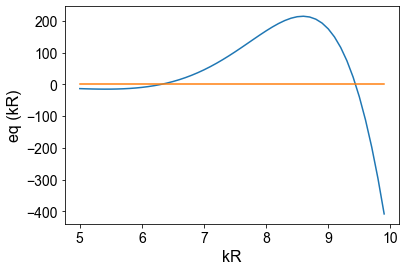

In [33]:
kR_val = np.arange(5,10,0.1)
eq_val = np.zeros(len(kR_val))

for i,n in enumerate(kR_val):
    eq_val[i] = eq(n)

plt.plot(kR_val,eq_val)
plt.plot(kR_val,np.zeros(len(kR_val)))
plt.xlabel('kR',fontsize = 16)
plt.ylabel('eq (kR)',fontsize = 16)

We see that there are 2 roots of the characteristic equation in the selected range $5<Kr<10$ at around $kR=6$ and $kR=9$. So solving for them we get:

In [34]:
soln2 = fsolve(eq,6)
display(Math('Root\;around\;kR = 6\;:\;\;{}'.format(sym.latex(soln2[0]))))

<IPython.core.display.Math object>

In [35]:
soln3 = fsolve(eq,9)
display(Math('Root\;around\;kR = 9\;:\;\;{}'.format(sym.latex(soln3[0]))))

<IPython.core.display.Math object>

Hence the solution of the vibrating plate can be said to be :

$$
w(r,t) = A\left(J_0\left(kr\right) - \frac{J_0(kR)}{I_0(kR)}I_0(kr)\right)\cos(\omega t + \phi)
$$

We will consider dimensionless amplitude of the solution above:
$$
\bar{w} = w/A = \left(J_0\left(\bar r \right) - \frac{J_0(\bar R)}{I_0(\bar R)}I_0(\bar r)\right)
$$

where $\bar{r}$ and $\bar{R}$ are dimensionless values

In [36]:
def w_bar(x,x_root):
    return j0(x_root*x)-(j0(x_root)/i0(x_root))*i0(x_root*x)

As $\bar r$ varies from 0 to $\bar R$ we considered the above function in such a way that we will vary $\bar r$ from $0$ to $1$ and the function will deal with the normalization

So will now try to plot the various normalized modes of the vibrations based on the 3 roots we obtained above:

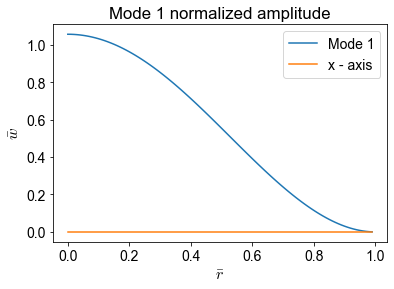

In [37]:
r_bar1 = np.arange(0,1,0.01)
wb1 = w_bar(r_bar1,soln1[0])
plt.plot(r_bar1,wb1, label = 'Mode 1')
plt.plot(r_bar1,np.zeros(len(r_bar1)), label = 'x - axis')
plt.xlabel(r'$\bar{r}$',fontsize=16)
plt.ylabel(r'$\bar{w}$',fontsize=16)
plt.title('Mode 1 normalized amplitude')
plt.legend()

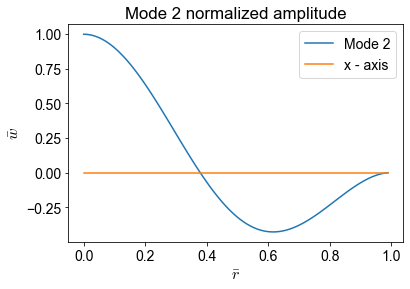

In [38]:
r_bar2 = np.arange(0,1,0.01)
wb2 = w_bar(r_bar2,soln2[0])
plt.plot(r_bar2,wb2, label = 'Mode 2')
plt.plot(r_bar2,np.zeros(len(r_bar2)), label = 'x - axis')
plt.xlabel(r'$\bar{r}$',fontsize=16)
plt.ylabel(r'$\bar{w}$',fontsize=16)
plt.title('Mode 2 normalized amplitude')
plt.legend()

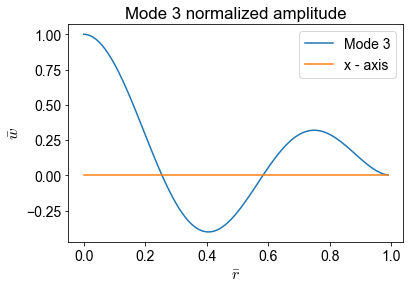

In [39]:
r_bar3 = np.arange(0,1,0.01)
wb3 = w_bar(r_bar3,soln3[0])
plt.plot(r_bar3,wb3, label = 'Mode 3')
plt.plot(r_bar1,np.zeros(len(r_bar1)), label = 'x - axis')
plt.xlabel(r'$\bar{r}$',fontsize=16)
plt.ylabel(r'$\bar{w}$',fontsize=16)
plt.title('Mode 3 normalized amplitude')
plt.legend()

If we combine the mode shapes in a single plot we will get a better picture of the vibration

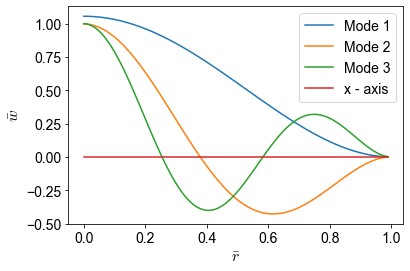

In [40]:
plt.plot(r_bar1,wb1, label = 'Mode 1')
plt.plot(r_bar2,wb2, label = 'Mode 2')
plt.plot(r_bar3,wb3, label = 'Mode 3')
plt.plot(r_bar1,np.zeros(len(r_bar1)), label = 'x - axis')
plt.xlabel(r'$\bar{r}$',fontsize=16)
plt.ylabel(r'$\bar{w}}$',fontsize=16)
plt.legend()



Now, we consider some values to numerically calcuate the mode frequencies of the plate. For this, we have considered 
the plate to be made of Aluminium, with the following properties:
​
  Density $(\rho)$ = 2770 kg/m^3
  
  poisson's ratio $(\nu)$ = 0.33
  
  Young's modulus ($E$) = 7.1e10 Pa 
  
  And the dimensions of the plate are considered to be as follows:
  
  Radius of plate (R) = 50 mm
  
  Ratio of plate thickness to the radius of plate $(h/R)$ = 0.1
  
  Using these values in the equations of
  
  $kR$ = 3.19622061658254 --- $(Eq 1) $, 
  
  $kR$ = 6.30643704768842 --- $(Eq 2)$  $\quad$ and 
  
  $kR$ = 9.43949913787635 --- $(Eq 3)$ $\quad$
   where $ k^4 = \left(\frac{h \omega^2\rho}{D}\right) $ 
  
  on simplifying futher gives $\quad$   $\omega = \left(\frac{x^4Eh^2}{12\rho R^4(1-\nu^2)}\right)^{1/2} $


$x$ =  value of root for correpsonding mode.

Substituing the values in the above equations  $(Eq 1)$ , $(Eq 2)$ and $(Eq 3) $    gives the values of modal frequencies of mode 1 , mode 2 and mode 3 respectively.

In [41]:
E,h,nu,R,rho,x = sym.symbols('E,h,nu,R,rho,x')
omega = sym.sqrt(x**4*(E*h**2)/(12*rho*R**4*(1-nu**2)))
display(omega)

sqrt(3)*sqrt(E*h**2*x**4/(R**4*rho*(1 - nu**2)))/6

Multiplying the above expression with    $ \frac{1}{2\pi}  $  gives the value of frequency in Hertz.

In [42]:
Al_modex =(1/(2*sym.pi))* omega.subs(E,7.1*10**10).subs(h,5/1000).subs(R,50/1000).subs(nu,0.33).subs(rho,2770).evalf()
display(Al_modex)

1548.22988042494*(x**4)**0.5/pi

In [43]:
Al_mode1 = Al_modex.subs(x,3.19622061658254).evalf()
Al_mode1
display(Math('mode\ 1\ frequency = {}'.format(sym.latex(Al_mode1))))

<IPython.core.display.Math object>

In [44]:
Al_mode2 = Al_modex.subs(x,6.30643704768842).evalf()
Al_mode2
display(Math('mode\ 2\ frequency = {}'.format(sym.latex(Al_mode2))))

<IPython.core.display.Math object>

In [45]:
Al_mode3 = Al_modex.subs(x,9.43949913787635).evalf()
Al_mode3
display(Math('mode\ 3 frequency = {}'.format(sym.latex(Al_mode3))))

<IPython.core.display.Math object>

<a id="cell3"></a>

### b. Validating the solution obtained with Modal analysis performed in ANSYS

Now, To validate our results, we have chosen the Numerical analysis tool ANSYS and recreated the same problem i.e. MODAL ANALYSIS of the circular plate clamped plate. In ANSYS, the procedure to perfrom this analysis consists of following steps.
1. Design of circular plate according to the dimensions [mentioned here](#cell4).
2. Defining the co-ordinate system for the problem.
3. Defining the material of plate.
4. Meshing the plate based on required accuracy. (size of meshing element used is 1 mm)
5. Defining the structural Boundary conditions.
6. Selecting the required Results from the provided options and Solve. ( Directional deformation along Z - axis of plate is selected for this problem).

The results obtained will be in the form of Deformed shapes of plate corresponding to the mode shapes along with the Graphs of Deformation along the Diameter of plate (User defined path). 
The results are as follows:

**1) Mode 1 of plate:**

 a) Deformed shape of plate: 
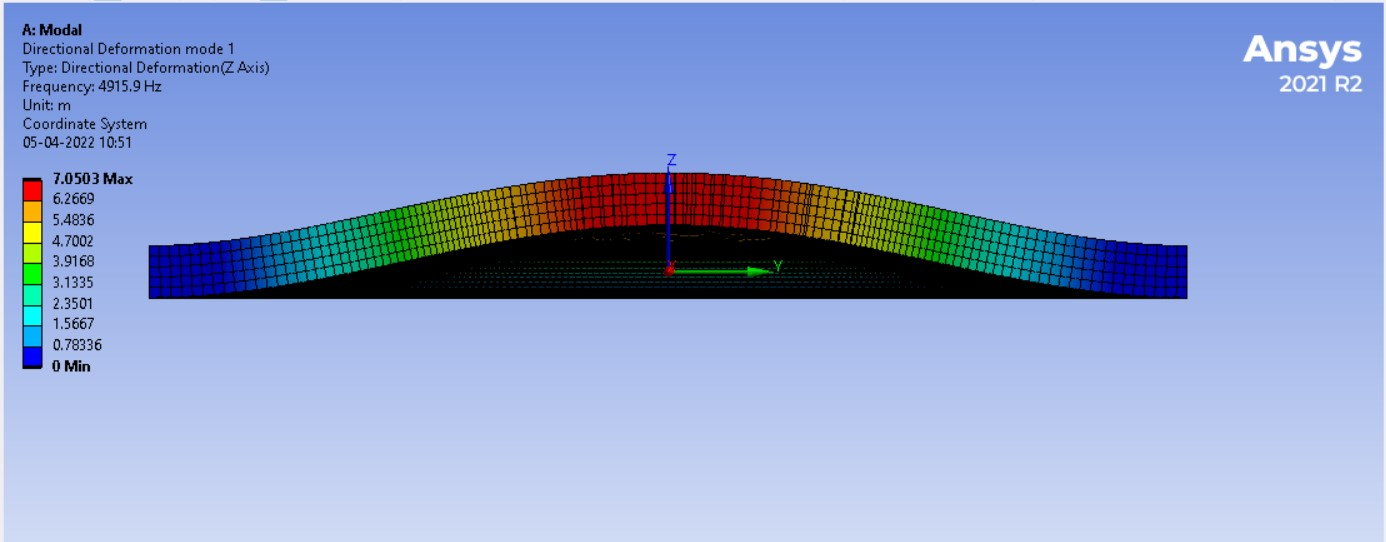

 b) Graph of Deflection of plate along Z-axis (w) along the diameter for Mode 1:
 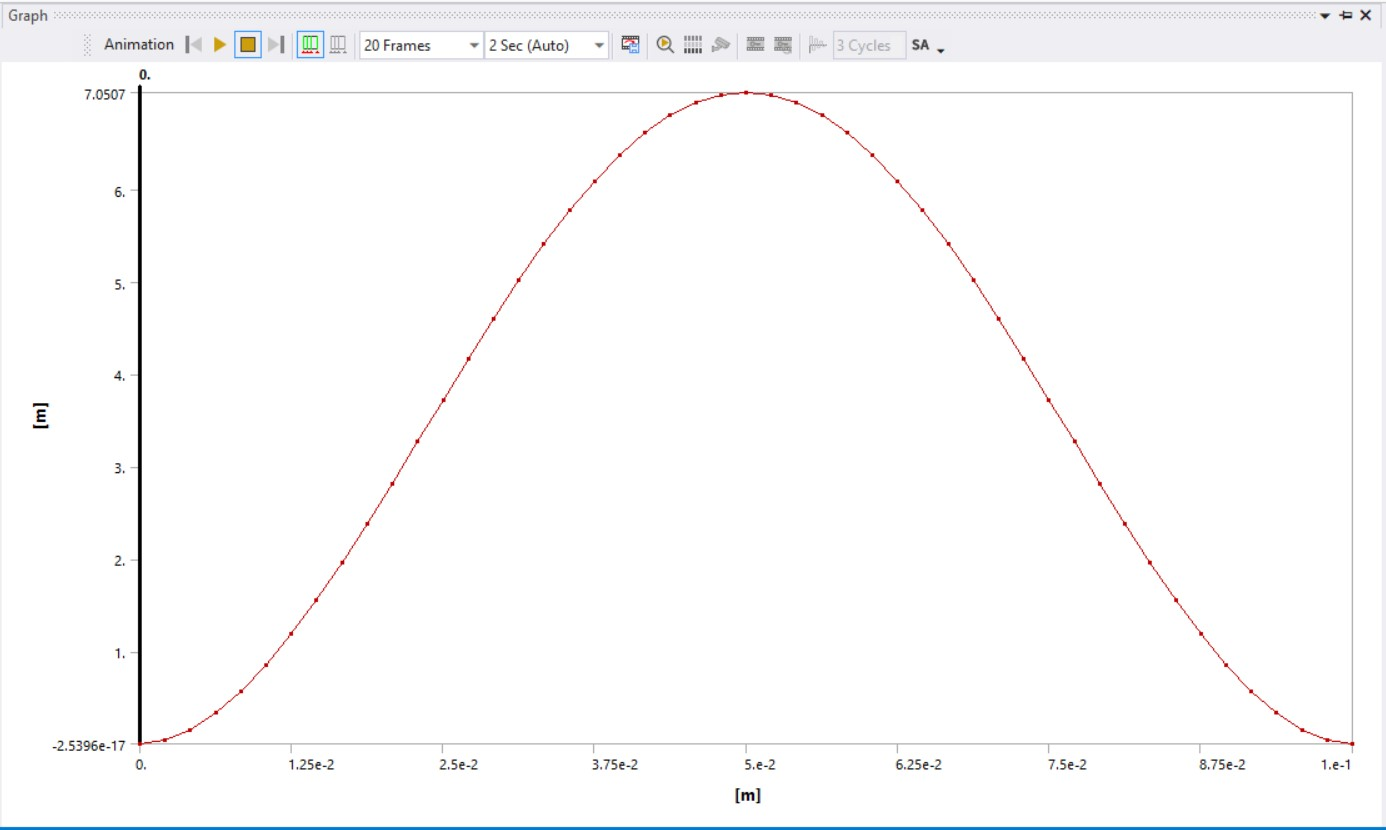

**2) Mode 2 of plate:**

 a) Deformed shape of plate:
 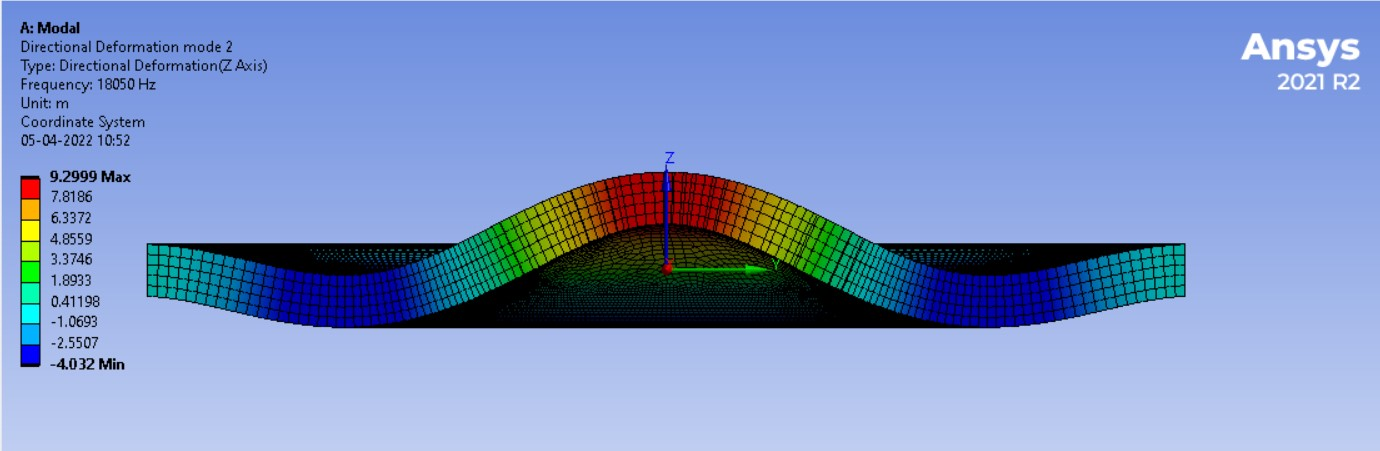

 b) Graph of Deflection of plate along Z-axis (w) along the diameter for Mode 2:
 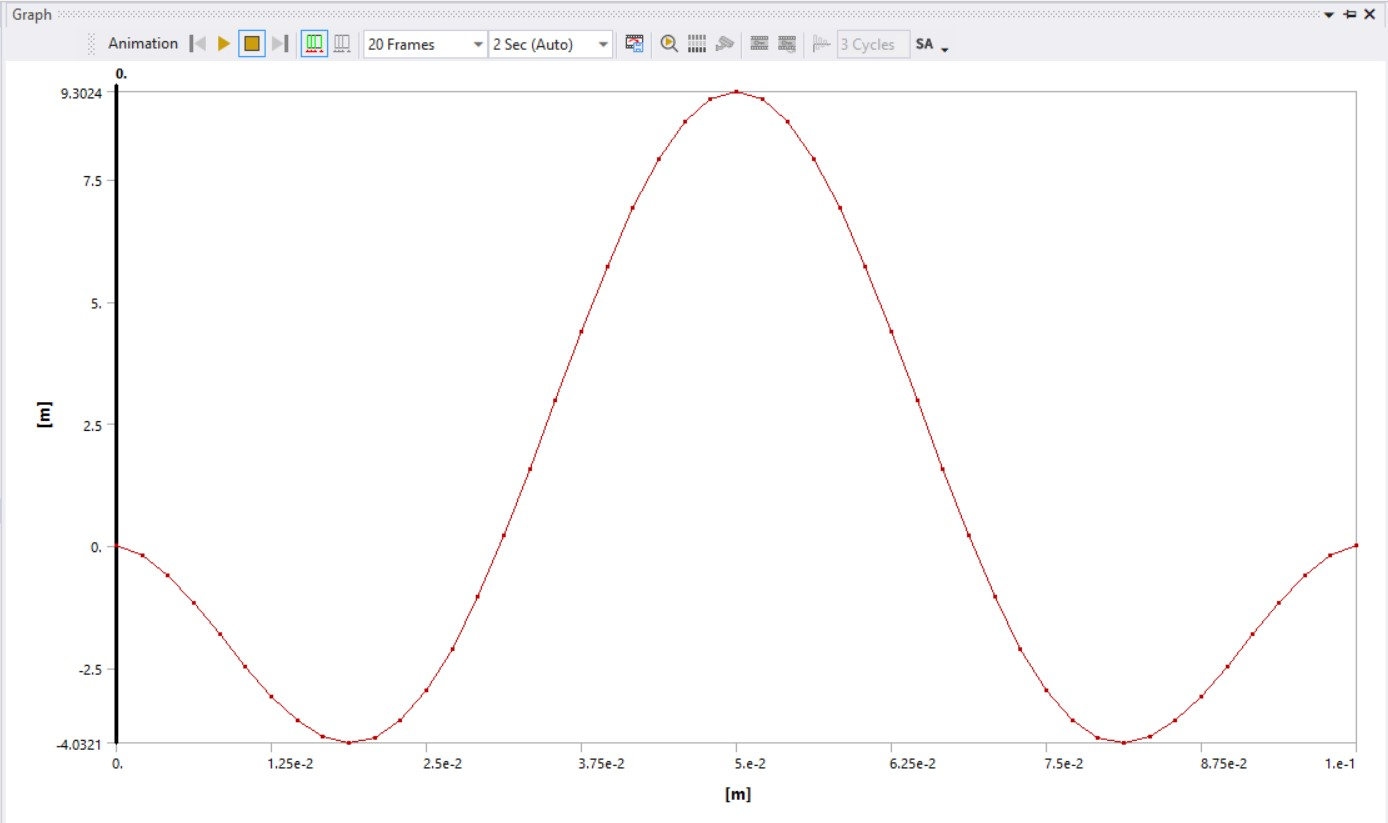

**3) Mode 3 of plate:** 

 a) Deformed shape of plate:
 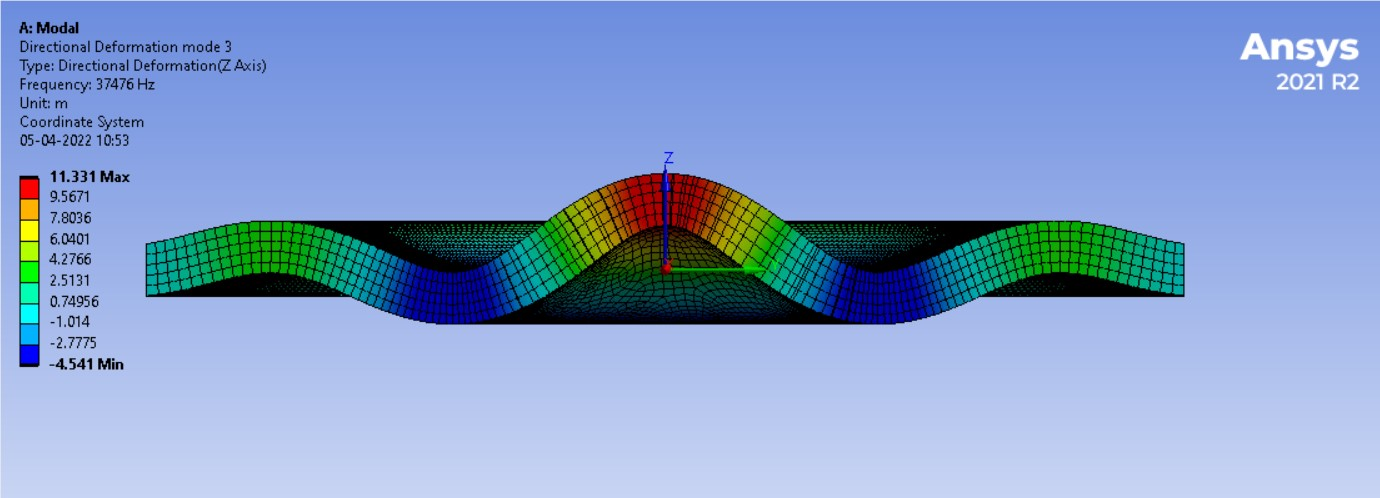

 b) Graph of Deflection of plate along Z-axis (w) along the diameter for Mode 3:
 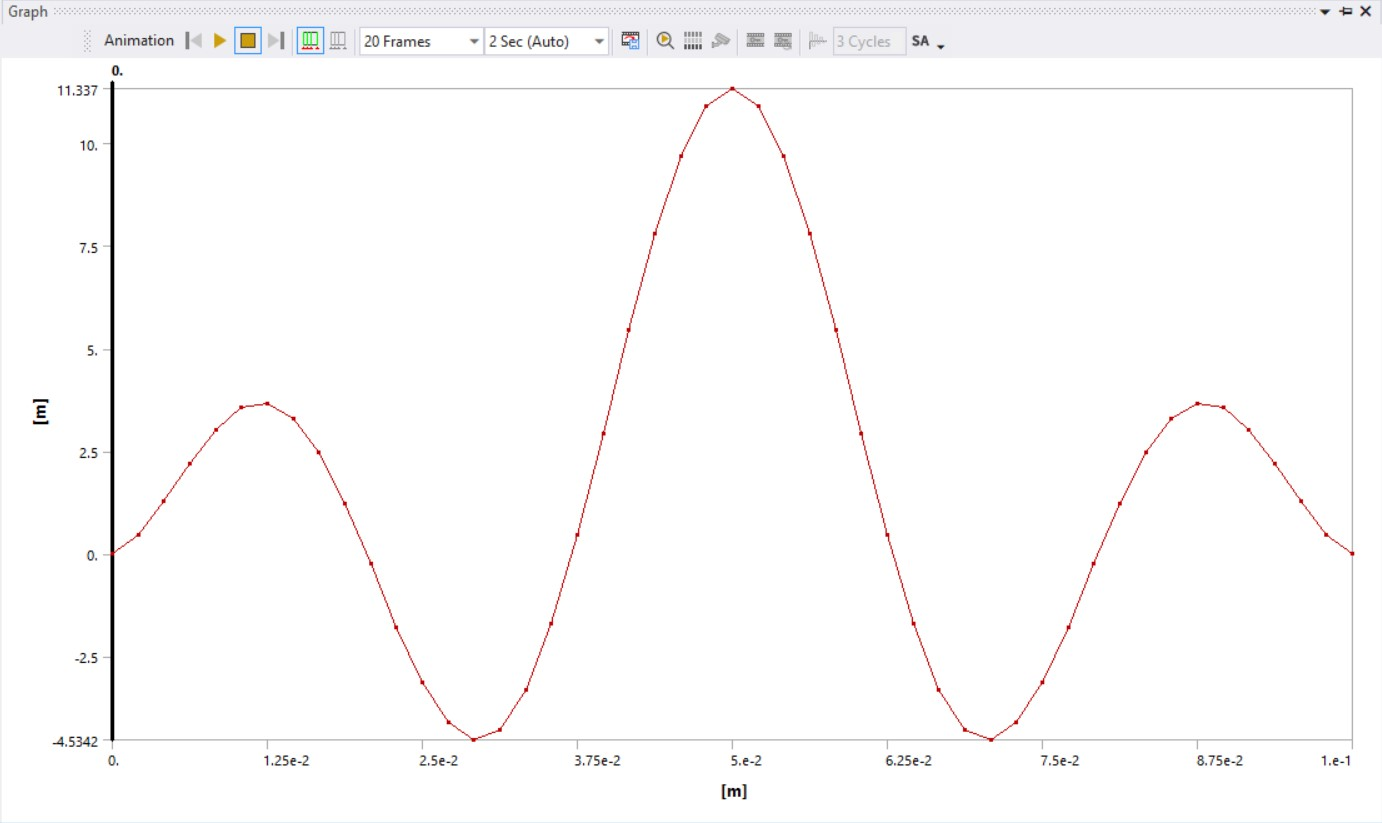

Comparing the results obtained from the theoritical calculations and Ansys.

<table ><tr><th >S.No. <th><th> Mode # <th><th>Theoritical calculation of frequency(Hz)  <th><th> ANSYS result (Hz) <th><th> Accuracy <th><th>
<tr><td> 1 <td><td> Mode 1 <td><td> 5034.53  <td><td> 4915.9 <td><td> 2.3% <td><tr><tr><td> 2 <td><td> Mode 2 <td><td> 19599.89  <td><td> 18050 <td><td> 7.9% <td><tr><tr><td> 3 <td><td> Mode 3  <td><td> 43912.025 <td><td> 37476 <td><td> 14.65%  <td><tr><table>


>This marks the end of our project work. 

### References:

1. Course work: &nbsp;  [Advanced mechanics of solids (ME60402)](http://www.facweb.iitkgp.ac.in/~jeevanjyoti/teaching/advmechsolids/2022/index.html) instructed by professor [Dr Jeevanjyoti Chakraborty](http://www.facweb.iitkgp.ac.in/~jeevanjyoti/)

 2. [NPTEL Lectures on Mechanical Vibrations of Structures](https://www.youtube.com/playlist?list=PLbMVogVj5nJTNlrJylW9den5nuoWbpNX6) by Dr. Anirvan Dasgupta. 


3. Textbook: &nbsp;  _Solid Mechanics – A Variational Approach_  by Clive L. Dym and Irving H. Shames (Springer).

4. Textbook: &nbsp; _Fundamentals of Vibrations_ by Leonard Meirovitch